In [ ]:
import numpy as np
def sigm(x):       # 시그모이드 함수
  return 1/(1+np.exp(-x))
def d_sigm(x):  # 시그모이드 함수의 미분
      return x*(1-x)
x = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]]) # XOR 입력 행렬과 바이어스
d = np.array([[0], [1], [1], [0]])       # 출력 목표 행렬
inputs = 3  # 입력 개수
hiddens = 6 # 1층 노드 개수
outputs = 1 # 2의 노드 개수
w1 = 2*np.random.random((inputs, hiddens))-1   # 가중치  –1.0~1.0 로 초기화
w2 = 2*np.random.random((hiddens, outputs))-1
print(w1),  print(w2)

[[-0.43879069  0.56591944 -0.11145531  0.71845832 -0.16680493 -0.95361071]
 [-0.94695718  0.84619754  0.7084902   0.08944183  0.8671791  -0.81267316]
 [ 0.88912011  0.61985657  0.78781861 -0.56143414  0.18749756 -0.82817901]]
[[-0.34055445]
 [-0.25756499]
 [ 0.74475977]
 [-0.08384976]
 [ 0.76242012]
 [ 0.85530675]]


(None, None)

In [ ]:
for i in range(10000):
    # 순방향 계산
    s1 = np.dot(x, w1)  # 행렬의 곱을 계산 WX
    f1 = sigm(s1)   # 활성화 함수를 적용
    f1[:,-1] = 1.0      #  마지막 열은 바이어스1.0
    s2 = np.dot(f1, w2) # 행렬의 곱을 계산한다.
    f2 = sigm(s2)   # 활성화 함수를 적용한다.
    # 역방향 계산
    f2_error = f2-d     # 출력층에서의 오차
    f2_delta = f2_error*d_sigm(f2)  # 출력층에서의 델타값
    f1_error = np.dot(f2_delta, w2.T)  # 역방향 오차 전파시는 행렬이 전치
    f1_delta = f1_error*d_sigm(f1)  # 은닉층에서의 델타를 계산
    w2 += -0.2*np.dot(f1.T, f2_delta)  # 2층 가중치 수정
    w1 += -0.2*np.dot(x.T, f1_delta) # 1층 가중치 수정
print(f2)     # 출력층의 값
print('W1',w1),  print('W2',w2)


[[0.02364818]
 [0.96585668]
 [0.97824899]
 [0.0308679 ]]
W1 [[-5.08932143 -3.02560743  2.00180153  4.57288474 -1.18181986 -0.95361071]
 [-5.83117089  4.47722219  2.68150161  3.29346414  0.59758089 -0.81267316]
 [ 2.01501319  1.73917284  0.37618972 -5.92358629  0.16474253 -0.82817901]]
W2 [[-7.60643667]
 [-3.37042009]
 [ 3.63298643]
 [-8.34937871]
 [ 1.67296003]
 [ 2.82071222]]


(None, None)

In [ ]:
# Prediction
x = np.array([[0.9,0.9,1]])   # 1에가까운 값
s1 = np.dot(x, w1)  # 행렬의 곱을 계산 WX
f1 = sigm(s1)   # 활성화 함수를 적용
f1[:,-1] = 1.0      #  마지막 열은 바이어스 1.0
print('f1: ',f1)
s2 = np.dot(f1, w2) # 행렬의 곱
f2 = sigm(s2)   # 활성화 함수를 적용
print('f2:', f2)
print('W1',w1),  print('W2',w2)

f1:  [[4.04105696e-04 9.54593318e-01 9.89960747e-01 7.60628388e-01
  4.10699958e-01 1.00000000e+00]]
f2: [[0.07821014]]
W1 [[-5.08932143 -3.02560743  2.00180153  4.57288474 -1.18181986 -0.95361071]
 [-5.83117089  4.47722219  2.68150161  3.29346414  0.59758089 -0.81267316]
 [ 2.01501319  1.73917284  0.37618972 -5.92358629  0.16474253 -0.82817901]]
W2 [[-7.60643667]
 [-3.37042009]
 [ 3.63298643]
 [-8.34937871]
 [ 1.67296003]
 [ 2.82071222]]


(None, None)

In [15]:
import scipy
import numpy as np
import matplotlib
import tensorflow
import keras
import cv2
print('scipy' + scipy.__version__)
print('numpy' + np.__version__)
print('matplotlib' + matplotlib.__version__)
print('tensorflow' + tensorflow.__version__)
print('keras' + keras.__version__)
print('opencv' + cv2.__version__)


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels);  test_labels = tf.keras.utils.to_categorical(test_labels)
model = tf.keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #'rmsprop', 'mse'
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)


scipy1.11.3
numpy1.23.5
matplotlib3.7.1
tensorflow2.14.0
keras2.14.0
opencv4.8.0
Epoch 1/5
469/469 [==============================] - 4s 4ms/step - loss: 0.5100 - accuracy: 0.8219
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3776 - accuracy: 0.8650
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3330 - accuracy: 0.8788
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3087 - accuracy: 0.8866
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.8790
테스트 정확도: 0.8790000081062317


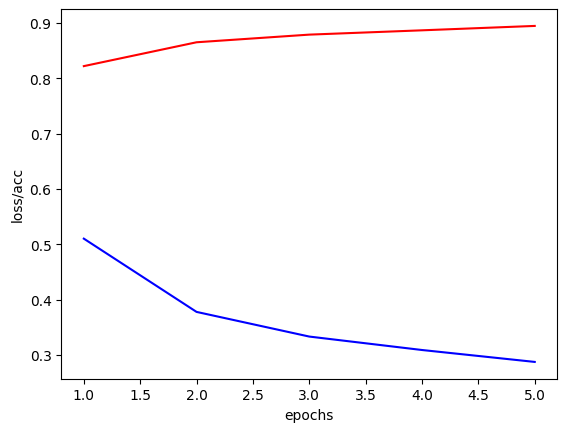

1/1 [==============================] - 0s 121ms/step
분류 결과 :  5


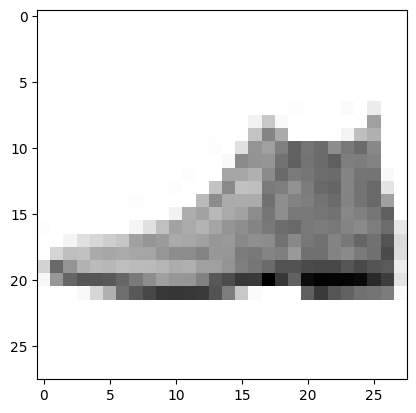

In [16]:
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs'); plt.ylabel('loss/acc')
plt.show()
img = np.expand_dims(test_images[9999], axis=0)
predictions = model.predict(img)
print("분류 결과 : ",np.argmax(predictions))
plt.imshow(test_images[0], cmap="Greys")

313/313 [==============================] - 1s 2ms/step
[[907   0   9  11   5   0  62   0   6   0]
 [  5 963   0  24   4   0   3   0   1   0]
 [ 24   0 823  10  76   0  66   0   1   0]
 [ 50   3   7 871  38   0  28   0   3   0]
 [  0   0 139  23 756   0  80   0   2   0]
 [  0   0   0   1   0 960   0  27   1  11]
 [181   0  95  26  56   0 632   0  10   0]
 [  0   0   0   0   0  15   0 969   0  16]
 [  9   0   4   4   5   2   3   4 969   0]
 [  0   0   0   0   0   6   1  53   0 940]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.76      0.82      0.79      1000
           3       0.90      0.87      0.88      1000
           4       0.80      0.76      0.78      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.63      0.67      1000
           7       0.92      0.97      0.94      1000
           8       0.98    

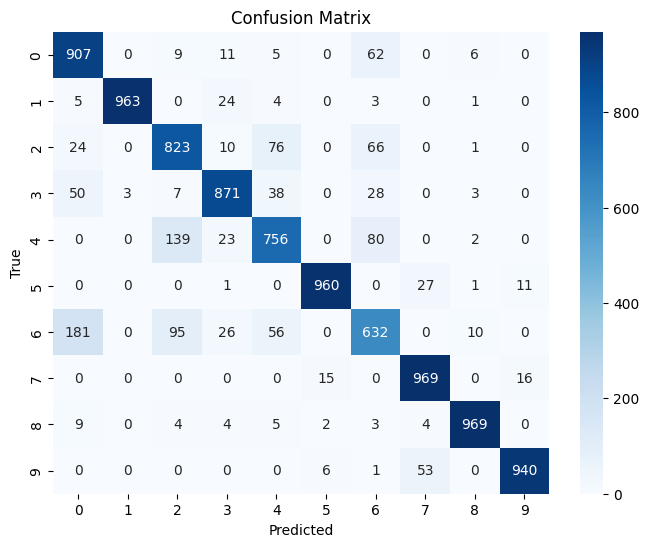

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
print( confusion_matrix(y_true, y_pred_classes))
print( classification_report(y_true, y_pred_classes))
print( accuracy_score(y_true, y_pred_classes))
# Confusion Matrix 시각화
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
mi

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0128 - accuracy: 0.9959
Epoch 4/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0367 - accuracy: 0.9915
테스트 정확도: 0.9915000200271606


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

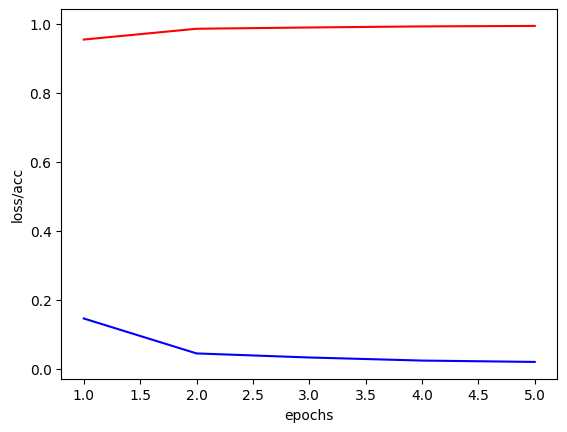

1/1 [==============================] - 0s 77ms/step
추정된 숫자= 6


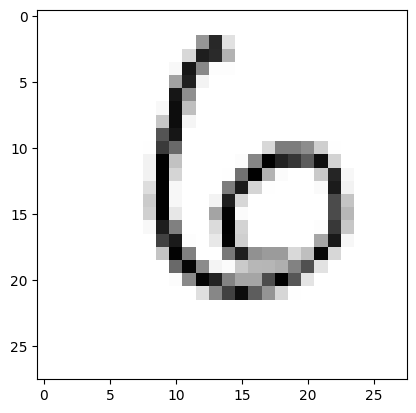

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()
pred = model.predict(test_images[100].reshape(1,28,28,1), batch_size=1)
print("추정된 숫자=", pred.argmax())
plt.imshow(test_images[100], cmap="Greys")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 576)              

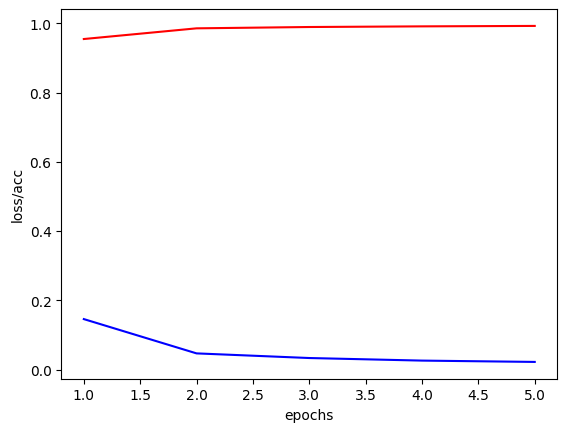

1/1 [==============================] - 0s 66ms/step
추정된 숫자= 6
313/313 [==============================] - 1s 2ms/step
[[ 977    2    0    0    0    0    0    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    6 1015    0    0    0    3    7    0    0]
 [   2    2    3  998    0    4    0    0    1    0]
 [   0    1    0    0  971    0    6    1    0    3]
 [   2    1    0    9    0  864    6    1    5    4]
 [   1    2    0    0    2    0  953    0    0    0]
 [   0    9    5    1    1    0    0 1011    0    1]
 [   6    3    3    0    0    0    2    0  959    1]
 [   0    2    0    0    6    2    1    7    1  990]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99    

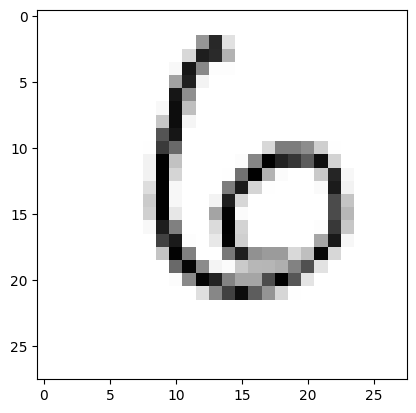

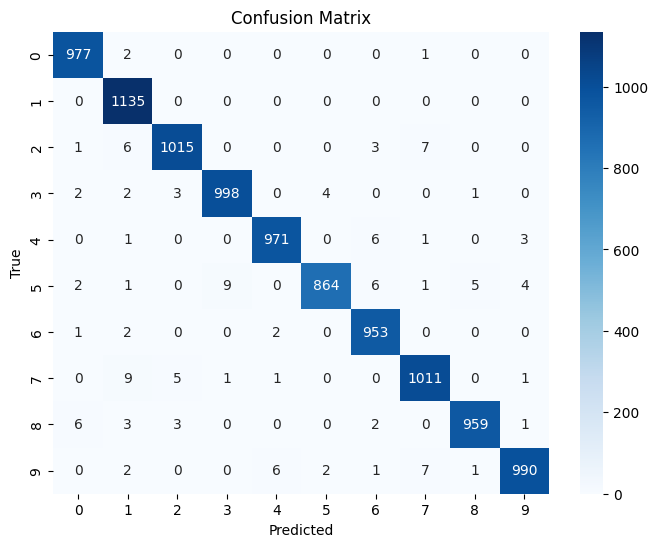

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()
pred = model.predict(test_images[100].reshape(1,28,28,1), batch_size=1)
print("추정된 숫자=", pred.argmax())
plt.imshow(test_images[100], cmap="Greys")

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
print( confusion_matrix(y_true, y_pred_classes))
print( classification_report(y_true, y_pred_classes))
print( accuracy_score(y_true, y_pred_classes))
# Confusion Matrix 시각화
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
print( confusion_matrix(y_true, y_pred_classes))
print( classification_report(y_true, y_pred_classes))
print( accuracy_score(y_true, y_pred_classes))
# Confusion Matrix 시각화
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()